# Upper Confidence Bound

## 1. Import the libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 2. Import the dataset

In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## 3. Implementing the UCB algorithm

In [9]:
n = 10000
d = 10
ads_selected = []
num_of_selections = [0]*d
sum_of_rewards = [0]*d
total_rewards = 0
for i in range(0, n):
    ad = 0
    max_upper_bound = 0
    for j in range(0, d):
        if (num_of_selections[j] > 0):
            avg_reward = sum_of_rewards[j]/num_of_selections[j]
            delta_i = math.sqrt(3/2*math.log(i+1)/num_of_selections[j])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = j
    ads_selected.append(ad)
    num_of_selections[ad] += 1
    sum_of_rewards[ad] += dataset.values[i, ad]
    total_reward = total_reward + dataset.values[i, ad]

## 4. Visualizing the result

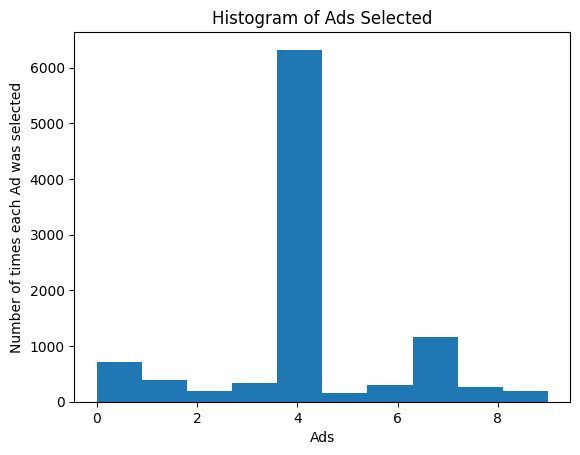

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()